# PCA WITHOUT USING LIBRARY

In [2]:
import numpy as np
import pandas as pd


In [3]:
class PCA:
    def __init__(self,n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
    
    def fit(self,X):
        
        self.mean = np.mean(X,axis = 0)
        X = X-self.mean
        
        #covariance matrix
        cov = np.cov(X.T)
        
        #eigenvectors ,eigenvalues
        eigenvalues,eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        
        #sort eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
      
        eigenvalues = eigenvalues[idxs]
        
        eigenvectors =  eigenvectors[idxs]
       
        #store first n eigenvectors
        self.components = eigenvectors[0:self.n_components]
        
        
    def transform(self,X):
        
        X = X-self.mean
        k = np.dot(X,self.components.T)
        
        return k
    
    def inverse_transform(self,k):
        return np.dot(k, self.components) + self.mean
    

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np


<Figure size 432x288 with 0 Axes>

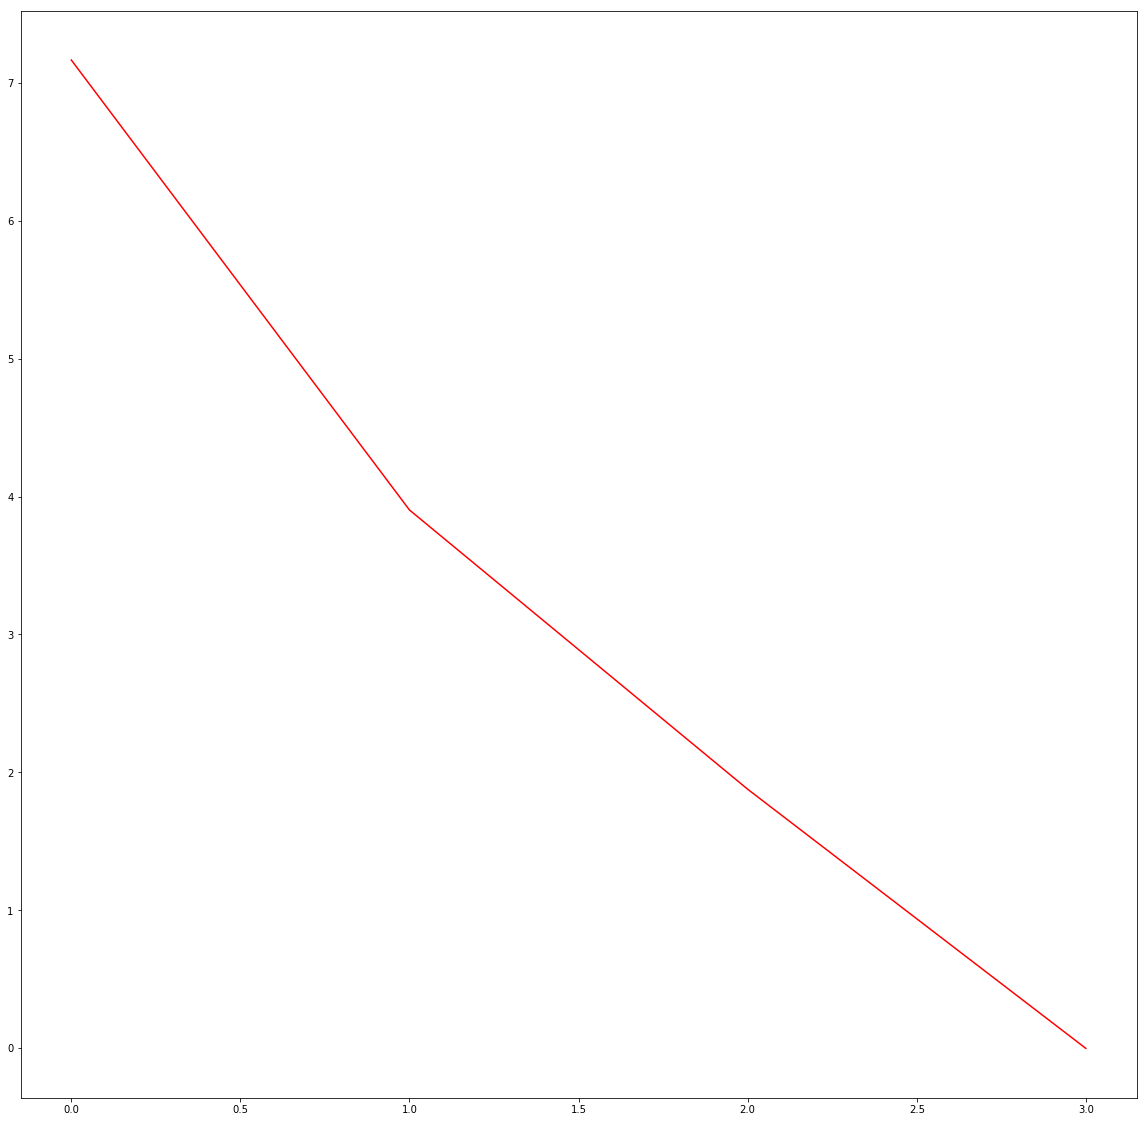

In [9]:
data = datasets.load_iris()
X = data.data
y = data.target
error = []
for i in range(1,5):
    pca = PCA(i)
    pca.fit(X)
    result = pca.transform(X)
    inverse_result = pca.inverse_transform(result)
    
    loss = np.linalg.norm((X-inverse_result),None)
    error.append(loss)

plt.clf()
plt.figure(figsize=(20,20))
plt.plot(error,'r')






# PCA USING LIBRARY

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [12]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values

In [14]:
y = df.loc[:,['target']].values

In [15]:
x = StandardScaler().fit_transform(x)

In [16]:
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [17]:
pca = PCA(n_components=2)

In [19]:
principalComponents = pca.fit_transform(x)

In [20]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [21]:
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [22]:
df[['target']].head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [23]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


<Figure size 432x288 with 0 Axes>

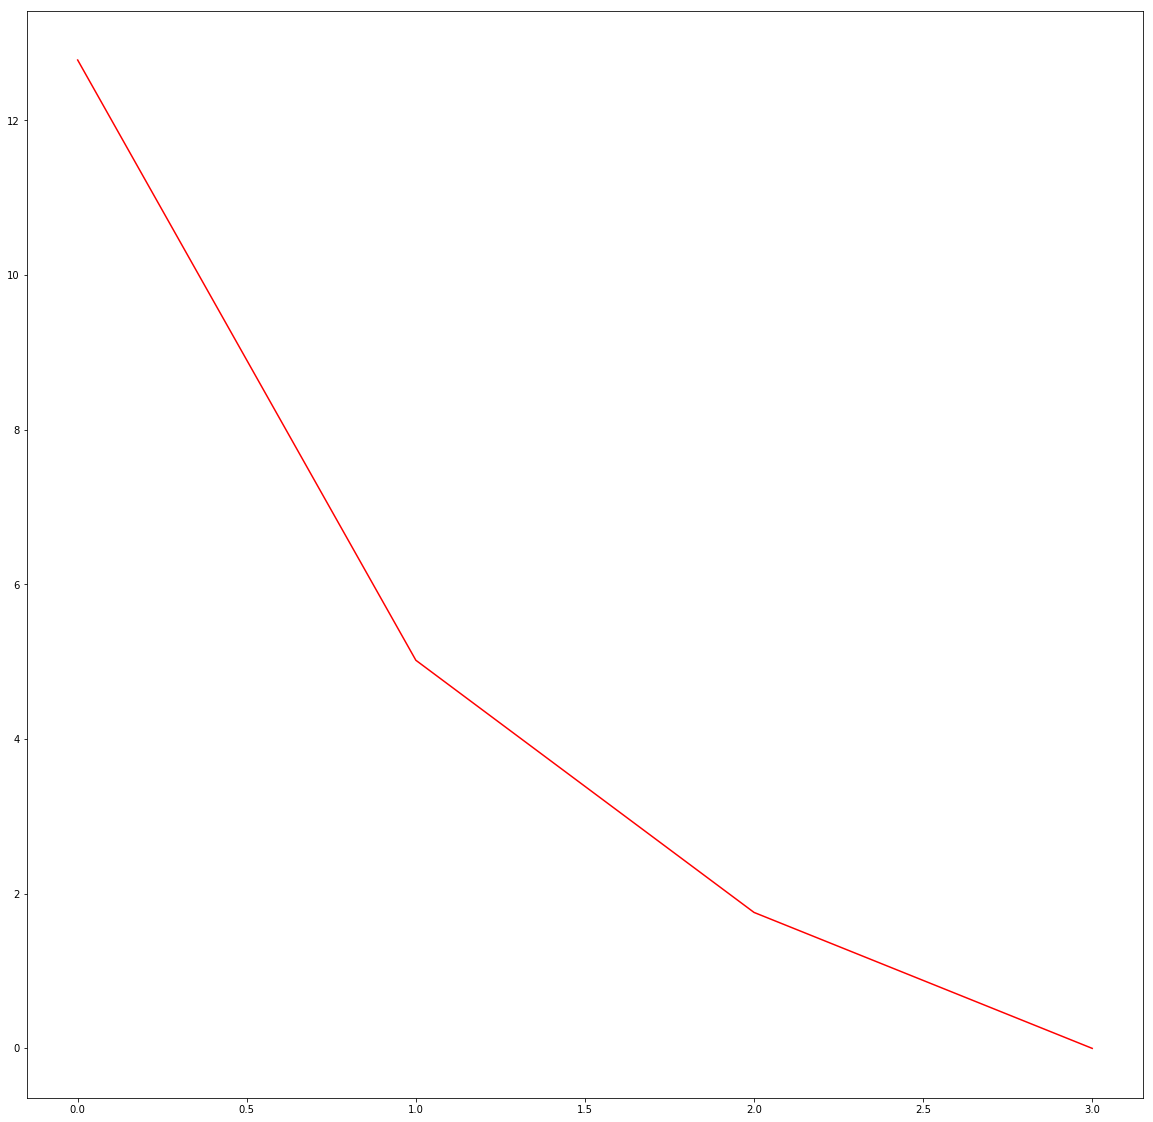

In [24]:

error = []
for i in range(1,5):
    pca = PCA(i)
    pca.fit(x)
    result = pca.transform(x)
    inverse_result = pca.inverse_transform(result)
    
    loss = np.linalg.norm((x-inverse_result),None)
    error.append(loss)

plt.clf()
plt.figure(figsize=(20,20))
plt.plot(error,'r')